In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time
import glob
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb


In [4]:
# function to download all listings data
def get_listings_berlin_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('berlin')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data4',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data4/raw-data/berlin_{date}.csv',index=False)
get_listings_berlin_timeseries()

NameError: name 'bs' is not defined

In [3]:
# pull in detailed_listings
raw_df_berlin = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_berlin)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(berlin_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 17499 AirBnb listings.


In [4]:
berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
berlin_raw_df_12_12_2020.shape


(20224, 16)

In [5]:
# use magic commands 'cd' to change directory
# use glob to locate all files for berlin
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_berlin = glob.glob('berlin/**.csv')
files_berlin

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['berlin/Berlin_2020-12.csv',
 'berlin/Berlin_2021-09.csv',
 'berlin/Berlin_2021-08.csv',
 'berlin/Berlin_2021-01.csv',
 'berlin/Berlin_2021-03.csv',
 'berlin/Berlin_2021-02.csv',
 'berlin/Berlin_2021-06.csv',
 'berlin/Berlin_2021-07.csv',
 'berlin/Berlin_2021-10.csv',
 'berlin/Berlin_2021-04.csv']

In [6]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

berlin_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(berlin_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(berlin_raw_df_12_12_2020['price'].mean(),2)}.")

berlin_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(berlin_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_1_9_2021['price'].mean(),2)}.")

berlin_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(berlin_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_2_8_2021['price'].mean(),2)}.")

berlin_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(berlin_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_3_4_2021['price'].mean(),2)}.")

berlin_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(berlin_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_4_9_2021['price'].mean(),2)}.")

#berlin_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(berlin_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_5_19_2021['price'].mean(),2)}.")

berlin_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-06.csv')
print(f"The 6_3_2021 dataset contains {len(berlin_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_6_3_2021['price'].mean(),2)}.")

berlin_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(berlin_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_7_4_2021['price'].mean(),2)}.")

berlin_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(berlin_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_8_6_2021['price'].mean(),2)}.")

berlin_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(berlin_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_9_7_2021['price'].mean(),2)}.")

berlin_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(berlin_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_10_6_2021['price'].mean(),2)}.")

#berlin_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/berlin_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(berlin_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(berlin_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 20224 AirBnb listings; the avg price is €72.95.
The 1_9_2021 dataset contains 20050 AirBnb listings; the avg price is €70.29.
The 2_8_2021 dataset contains 19978 AirBnb listings; the avg price is €70.56.
The 3_4_2021 dataset contains 19858 AirBnb listings; the avg price is €70.78.
The 4_9_2021 dataset contains 19752 AirBnb listings; the avg price is €72.55.
The 6_3_2021 dataset contains 18978 AirBnb listings; the avg price is €73.54.
The 7_4_2021 dataset contains 19095 AirBnb listings; the avg price is €73.3.
The 8_6_2021 dataset contains 18547 AirBnb listings; the avg price is €74.48.
The 9_7_2021 dataset contains 18288 AirBnb listings; the avg price is €75.19.
The 10_6_2021 dataset contains 17500 AirBnb listings; the avg price is €74.9.


In [7]:
df_list_berlin = [berlin_raw_df_12_12_2020, berlin_raw_df_1_9_2021, berlin_raw_df_2_8_2021,
           berlin_raw_df_3_4_2021, berlin_raw_df_4_9_2021, berlin_raw_df_6_3_2021, berlin_raw_df_7_4_2021,
           berlin_raw_df_8_6_2021, berlin_raw_df_9_7_2021, berlin_raw_df_10_6_2021]

dates_berlin = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
        '06_03_2021', '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_berlin = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04',  '2021-06', '2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_berlin = []

def airbnb_parse_berlin(df_list, files):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_{file}.csv")
        print(f"The {file} berlin dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_berlin(df_list, dates):
    for file in files_berlin:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/berlin/berlin_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_berlin.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_berlin)

berlin_parse = airbnb_parse_berlin(df_list_berlin, files_berlin)


The 2020-12 berlin dataset contains 20224 AirBnb listings -- the avg price is €72.95.
The 2021-01 berlin dataset contains 20050 AirBnb listings -- the avg price is €70.29.
The 2021-02 berlin dataset contains 19978 AirBnb listings -- the avg price is €70.56.
The 2021-03 berlin dataset contains 19858 AirBnb listings -- the avg price is €70.78.
The 2021-04 berlin dataset contains 19752 AirBnb listings -- the avg price is €72.55.
The 2021-06 berlin dataset contains 18978 AirBnb listings -- the avg price is €73.54.
The 2021-07 berlin dataset contains 19095 AirBnb listings -- the avg price is €73.3.
The 2021-08 berlin dataset contains 18547 AirBnb listings -- the avg price is €74.48.
The 2021-09 berlin dataset contains 18288 AirBnb listings -- the avg price is €75.19.
The 2021-10 berlin dataset contains 17500 AirBnb listings -- the avg price is €74.9.


In [8]:
berlin_summary = airbnb_to_frame_berlin(df_list_berlin, files_berlin)
berlin_summary['Date of scrape'] = pd.to_datetime(berlin_summary['Date of scrape'])
berlin_summary['City'] = 'berlin'

dfi.export(berlin_summary,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/airbnb_berlin_summary.png")


In [9]:
master_df_berlin = pd.concat(df_list_berlin)
master_df_berlin_unique = master_df_berlin.drop_duplicates(subset='id')
master_df_berlin_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ion,Mitte,Brunnenstr. Süd,52.53454,13.40256,Entire home/apt,42,5,134,2020-09-26,2.34,6,180,NaN,NaN
1,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.53500,13.41758,Entire home/apt,90,62,146,2020-05-27,1.04,1,276,NaN,NaN
2,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.49885,13.34906,Private room,29,7,27,2019-05-31,0.30,1,355,NaN,NaN
3,6883,Stylish East Side Loft in Center with AC & 2 bikes,16149,Steffen,Friedrichshain-Kreuzberg,Frankfurter Allee Süd FK,52.51171,13.45477,Entire home/apt,79,7,133,2020-02-16,1.01,1,14,NaN,NaN
4,7071,BrightRoom with sunny greenview!,17391,BrightRoom,Pankow,Helmholtzplatz,52.54316,13.41509,Private room,33,1,293,2020-03-31,2.12,1,0,NaN,NaN


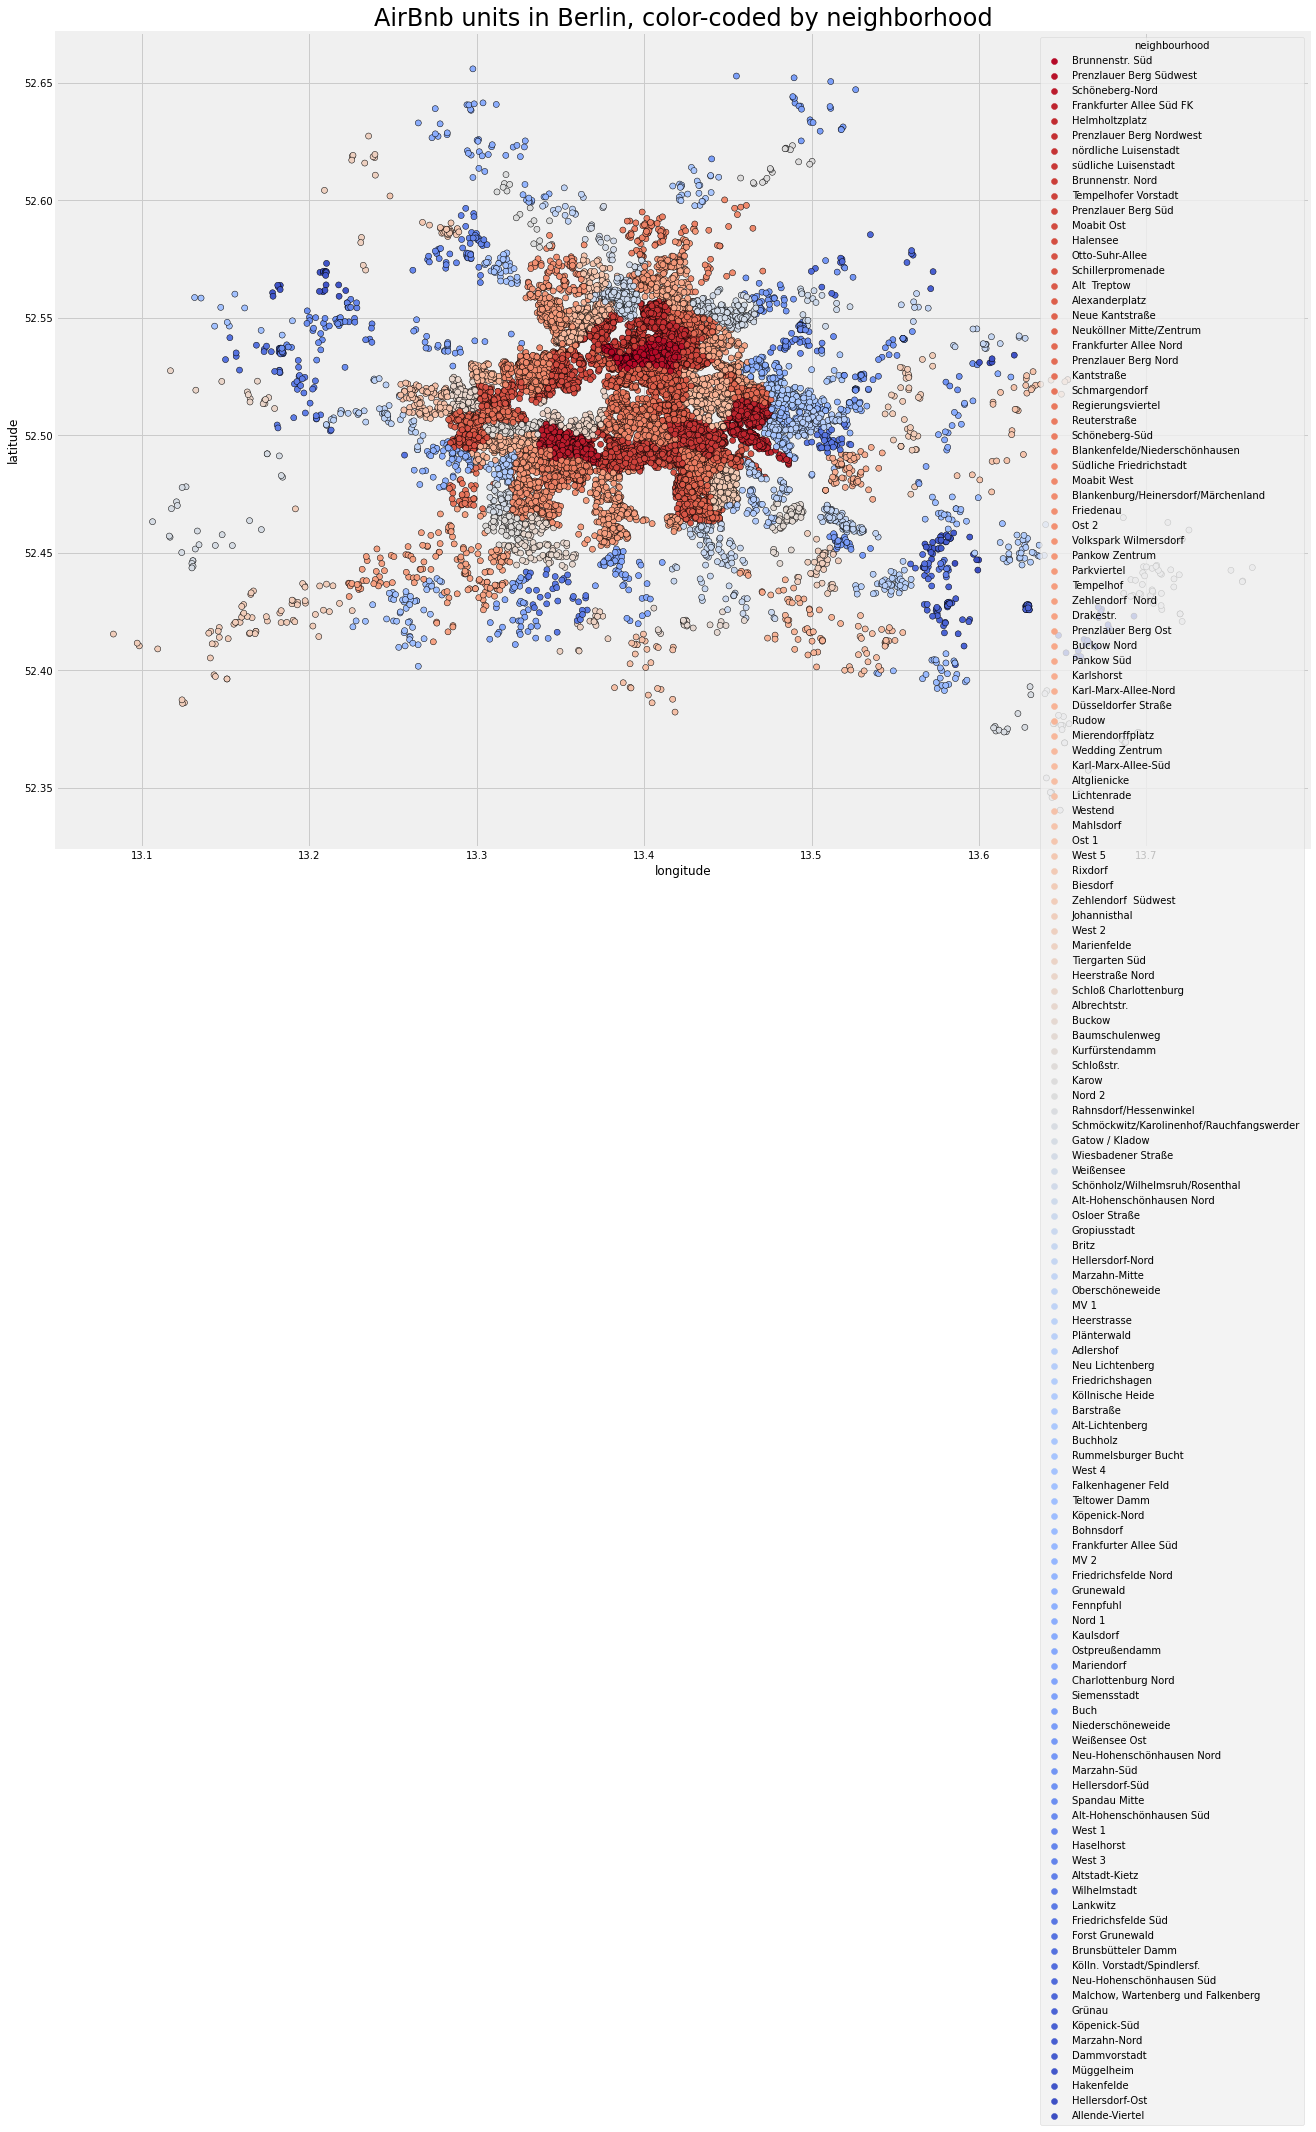

In [10]:
title = 'AirBnb units in Berlin, color-coded by neighborhood'
plt.figure(figsize=(20,15))
#sns.set_palette("Paired_r")
sns.scatterplot(master_df_berlin_unique.longitude, master_df_berlin_unique.latitude, hue = master_df_berlin_unique.neighbourhood, palette='coolwarm_r', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/airbnb_berlin_map.png')
plt.show()

## Add review data through a join

In [11]:
df_reviews = pd.concat([berlin_raw_df_10_6_2021,raw_df_berlin],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_ = df_reviews_[df_reviews_['accommodates'] <=6]
df_reviews_['accommodates'].value_counts()

2.0    9137
4.0    2619
1.0    2091
3.0    1965
6.0     668
5.0     576
0.0       6
Name: accommodates, dtype: int64

## Regression

In [21]:
#df_reviews_.columns

In [12]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [13]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  -24.921674068680844
Coefficients:  [ 9.43547363 19.40921657 -1.69053752  0.44267754  1.14838855 -5.95487652
  9.88784188 12.47791923 -8.41514   ]
LinearRegression()


In [14]:
y_pred2 = regr.predict(X_)

In [15]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
df_result = (df_mult_sort[df_mult_sort['Actual'] >=25])
#df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')


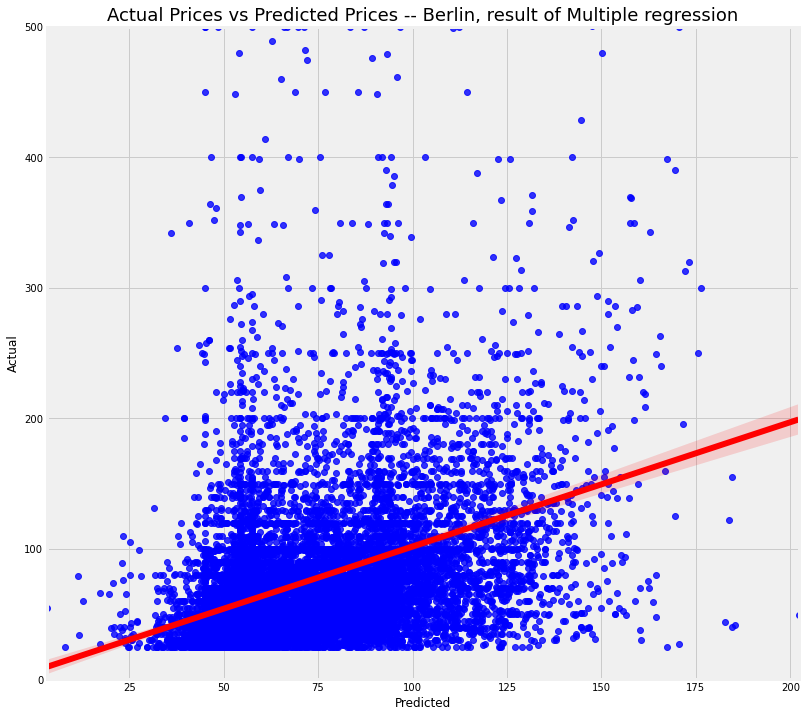

In [16]:
x = df_result['Predicted']
y = df_result['Actual']
fig = plt.figure(figsize=(12,12))
plt.title('Actual Prices vs Predicted Prices -- Berlin, result of Multiple regression', fontsize=18)
plt.xlabel('Predicted €')
plt.ylabel('Actual €')
plt.ylim([0,500])
ax = sns.regplot(x,y, data=df_result,  scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.figure.savefig('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/airbnb_berlin_multiple_regression.png')



In [17]:
df_result.shape

(14169, 3)

## The most mispriced [undervalued]

In [18]:
berlin_mispriced = df_result.sort_values(by=['Diff'], ascending=False)
berlin_mispriced['%'] = (berlin_mispriced['Actual']/ berlin_mispriced['Predicted'] -1) *100
berlin_mispriced_perc = berlin_mispriced.sort_values(by=['%'], ascending=True)
berlin_mispriced_perc_plot = berlin_mispriced_perc.loc[(berlin_mispriced_perc['Predicted']>=1) & (berlin_mispriced_perc['Diff']>= 1)]
berlin_mispriced_perc_plot = berlin_mispriced_perc_plot.sort_values(by=['%'],ascending=True)
berlin_mispriced_perc_plot.head()
                                                             
                                                   

,Actual,Predicted,Diff,%
15340,25,167.424124,142.424124,-85.067863
17016,27,170.454001,143.454001,-84.159949
16267,30,160.352861,130.352861,-81.291260
14765,25,130.825876,105.825876,-80.890631
17415,25,128.949770,103.949770,-80.612606


In [20]:

berlin_mispriced_1 = raw_df_berlin.loc[raw_df_berlin.id==15340]
berlin_mispriced_2 = raw_df_berlin.loc[raw_df_berlin.id==17016]
berlin_mispriced_3 = raw_df_berlin.loc[raw_df_berlin.index==16267]
berlin_mispriced_4 = raw_df_berlin.loc[raw_df_berlin.index==14765]
berlin_mispriced_5 = raw_df_berlin.loc[raw_df_berlin.index==17415]

In [21]:
id_array = [15340, 17016, 16267, 14765, 17415]

berlin_mispriced_query = raw_df_berlin.query('index in @id_array')
berlin_mispriced_query = berlin_mispriced_query.rename({'index': 'id'}, axis=1)
berlin_mispriced_query.shape
#berlin_mispriced_query.head(1)

(5, 74)

In [22]:
#berlin_mispriced_neg = raw_df_berlin.loc[raw_df_berlin.index==4119]
berlin_mispriced_perc_1 = raw_df_berlin.loc[raw_df_berlin.id==15340]
berlin_mispriced_perc_2 = raw_df_berlin.loc[raw_df_berlin.id==17016]
berlin_mispriced_perc_3 = raw_df_berlin.loc[raw_df_berlin.id==16267]
berlin_mispriced_perc_4 = raw_df_berlin.loc[raw_df_berlin.id==14765]
berlin_mispriced_perc_5 = raw_df_berlin.loc[raw_df_berlin.id==17415]

In [23]:
berlin_mispriced = berlin_mispriced_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
berlin_mispriced_1 = berlin_mispriced.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

berlin_mispriced_1[:1]
berlin_mispriced_1[:2]
berlin_mispriced_1[:3]
berlin_mispriced_1[:4]
berlin_mispriced_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
14765,43639223,$90.00,4.5,5.00,4.50,5.00,5.0,4.50,"Berlin, Germany",https://www.airbnb.com/rooms/43639223
15340,45209628,$90.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/45209628
16267,49523834,$195.00,NaN,NaN,NaN,NaN,NaN,NaN,"Berlin, Germany",https://www.airbnb.com/rooms/49523834
17016,51513538,$246.00,4.5,4.75,4.75,4.75,4.5,4.25,NaN,https://www.airbnb.com/rooms/51513538
17415,52610676,$125.00,5.0,5.00,5.00,5.00,5.0,5.00,NaN,https://www.airbnb.com/rooms/52610676


In [24]:
dfi.export(berlin_mispriced_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/airbnb_berlin_mispriced.png")



In [37]:
df_result.head()

,Actual,Predicted,Diff
7090,2517,164.987116,-2352.012884
16420,2000,57.388618,-1942.611382
10241,1289,121.866929,-1167.133071
10242,1317,156.067804,-1160.932196
9473,1200,129.514201,-1070.485799


## The best score

In [38]:
berlin_high_value = df_result.sort_values(by=['Predicted'], ascending=False)
berlin_high_value

,Actual,Predicted,Diff
2863,49,202.160668,153.160668
2865,42,185.305292,143.305292
12876,40,184.611135,144.611135
15109,155,184.476928,29.476928
16328,122,183.645326,61.645326
2875,44,182.639604,138.639604
9530,300,176.369425,-123.630575
8961,250,175.550718,-74.449282
5789,320,173.084478,-146.915522
15722,313,172.022822,-140.977178


In [39]:
id_array = [2863, 2865, 12786, 15019, 16328]

berlin_best_score_query = raw_df_berlin.query('index in @id_array')
berlin_best_score_query = berlin_best_score_query.rename({'index': 'id'}, axis=1)
#berlin_best_score_query.head(1)

In [40]:
berlin_best_score = berlin_best_score_query[['id','price','review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value','neighbourhood','listing_url']]
berlin_best_score_1 = berlin_best_score.rename({'review_scores_rating':'rating',
                                                    'review_scores_accuracy':'accuracy',
                                                    'review_scores_cleanliness':'cleanliness',
                                                    'review_scores_communication':'communication',
                                                    'review_scores_location':'location',
                                                    'review_scores_value':'value'}, axis=1)

berlin_best_score_1[:1]
berlin_best_score_1[:2]
berlin_best_score_1[:3]
berlin_best_score_1[:4]
berlin_best_score_1[:5]

,id,price,rating,accuracy,cleanliness,communication,location,value,neighbourhood,listing_url
2863,7824562,$49.00,4.63,4.82,4.66,4.82,4.64,4.66,"Berlin, Germany",https://www.airbnb.com/rooms/7824562
2865,7828523,$42.00,4.48,4.69,4.61,4.79,4.69,4.56,"Berlin, Germany",https://www.airbnb.com/rooms/7828523
12786,38343050,$69.00,4.52,4.89,4.37,4.63,4.56,4.48,"Berlin, Germany",https://www.airbnb.com/rooms/38343050
15019,44263824,$75.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.airbnb.com/rooms/44263824
16328,49822999,$92.00,4.00,3.50,4.50,4.50,4.50,4.00,NaN,https://www.airbnb.com/rooms/49822999


In [41]:
dfi.export(berlin_best_score_1,"/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/berlin/airbnb_berlin_best_score.png")


